# Tent & Norm Adaptation

In [37]:
import pandas as pd

record = pd.read_csv('./result/audio-mnist/tent/pre_train/training_records.csv')
record.head()

,Unnamed: 0,type,step,accuracy,loss
0,0,train,0,12.5000,2.303540
1,1,train,1,20.3125,2.298144
2,2,train,2,18.7500,2.296224
3,3,train,3,14.0625,2.297000
4,4,train,4,15.6250,2.294719


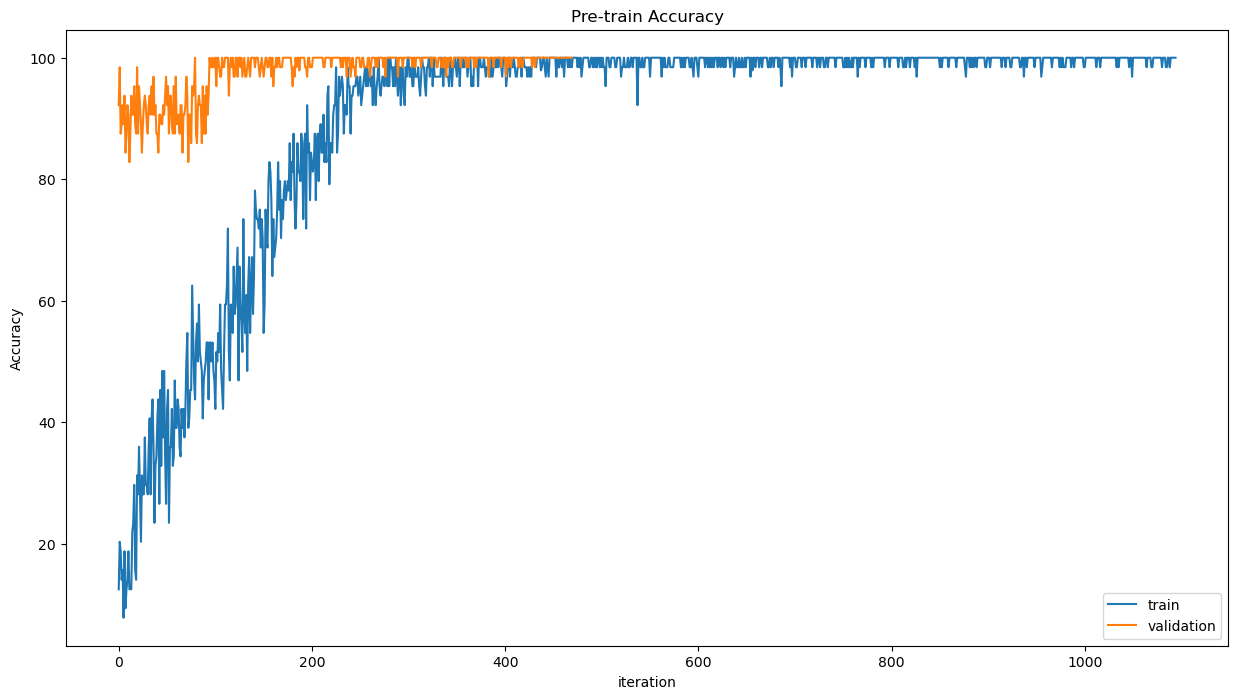

In [38]:
import matplotlib.pyplot as plt

train_record = record[record['type'] == 'train']
val_record = record[record['type'] == 'validation']
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['accuracy'], label='train')
plt.plot(val_record['step'], val_record['accuracy'], label='validation')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.title('Pre-train Accuracy')
plt.legend(loc='lower right')
plt.show()

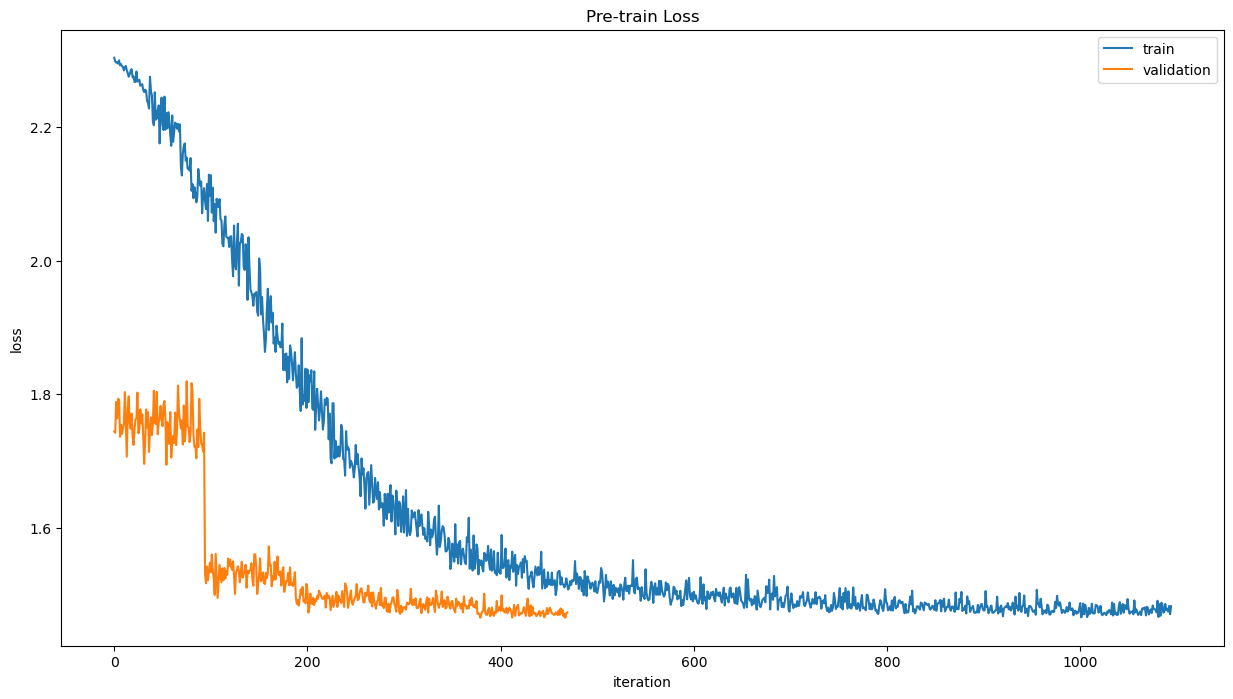

In [39]:
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['loss'], label='train')
plt.plot(val_record['step'], val_record['loss'], label='validation')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Pre-train Loss')
plt.legend()
plt.show()

# Test-Time Training (TTT)

In [40]:
record = pd.read_csv('./result/audio-mnist/ttt/pre_time_shift_train/ts_bn_accu_record.csv')
record.head()

,Unnamed: 0,dataset,type,step,accuracy,loss
0,0,audio-mnist,cls,0,10.317460,2.365511
1,1,audio-mnist,ssh,0,38.359788,1.096718
2,2,audio-mnist,cls,1,11.111111,2.283417
3,3,audio-mnist,ssh,1,74.074074,0.809246
4,4,audio-mnist,cls,2,15.873016,2.236067


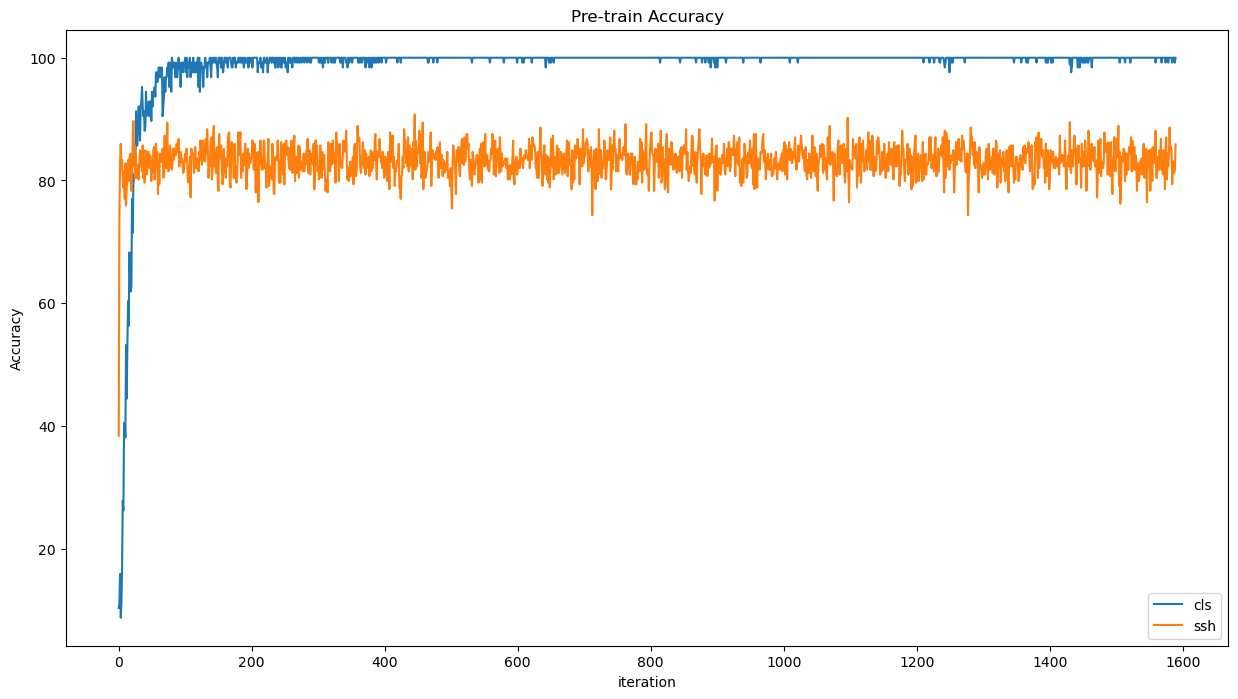

In [41]:
train_record = record[record['type'] == 'cls']
val_record = record[record['type'] == 'ssh']
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['accuracy'], label='cls')
plt.plot(val_record['step'], val_record['accuracy'], label='ssh')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.title('Pre-train Accuracy')
plt.legend(loc='lower right')
plt.show()

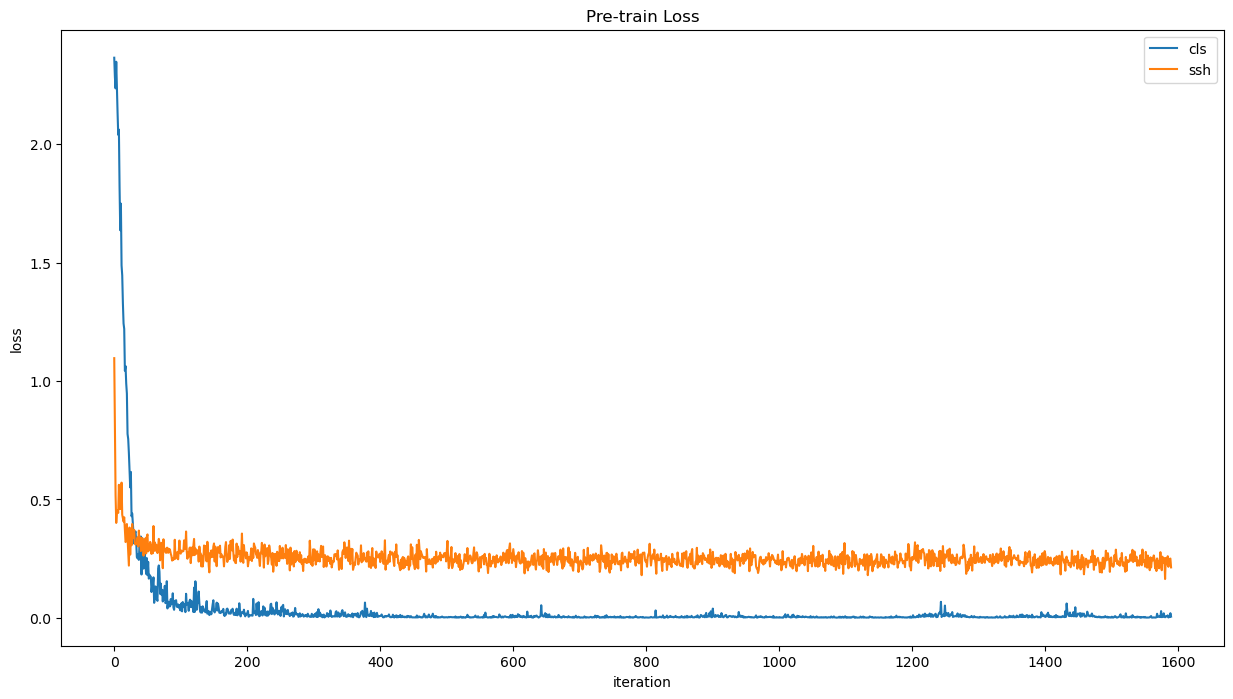

In [42]:
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['loss'], label='cls')
plt.plot(val_record['step'], val_record['loss'], label='ssh')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Pre-train Loss')
plt.legend()
plt.show()

# Test dataset accuracy comparing

In [43]:
import os

def combine_csvs(root_path: str) -> pd.DataFrame:
    records = []
    for sub_path in os.listdir(root_path):
        if 'accuracy_record' in sub_path and sub_path.endswith('.csv'):
            record = pd.read_csv(os.path.join(root_path, sub_path), index_col=0)
            records.append(record)
    return pd.concat(records, axis=0, ignore_index=True)

tent_analysis_root_path = './result/audio-mnist/tent/analysis'
tent_analysis_records = combine_csvs(tent_analysis_root_path)
tent_analysis_records

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,audio-mnist,restnet50,normalized,NaN,98.36,1.64,0.0000,25567042
1,audio-mnist,restnet50,normalized,gaussian_noise,60.49,39.51,0.0025,25567042
2,audio-mnist,restnet50,Tent Adaptation + normalized,gaussian_noise,93.45,6.55,0.0025,25567042
3,audio-mnist,restnet50,Norm Adaptation + normalized,gaussian_noise,91.16,8.84,0.0025,25567042
4,audio-mnist,restnet50,NaN,NaN,98.15,1.85,0.0000,25567042
5,audio-mnist,restnet50,NaN,gaussian_noise,64.08,35.92,0.0025,25567042
6,audio-mnist,restnet50,Tent Adaptation,gaussian_noise,92.53,7.47,0.0025,25567042
7,audio-mnist,restnet50,Norm Adaptation,gaussian_noise,91.28,8.72,0.0025,25567042
8,audio-mnist,restnet50,NaN,NaN,98.09,1.91,0.0000,25567042
9,audio-mnist,restnet50,NaN,gaussian_noise,26.79,73.21,0.0050,25567042


In [44]:
ttt_analysis_root_path = './result/audio-mnist/ttt/time_shift_analysis'
ttt_time_shift_records = combine_csvs(ttt_analysis_root_path)
ttt_time_shift_records

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,audio-mnist,RestNet_base,NaN,NaN,96.34,3.66,0.0000,737005
1,audio-mnist,RestNet_base,NaN,gaussian_noise,48.46,51.54,0.0025,737005
2,audio-mnist,RestNet_base,"TTT, ts, bn, online",gaussian_noise,71.48,28.52,0.0025,737005
3,audio-mnist,RestNet_base,NaN,NaN,96.27,3.73,0.0000,737005
4,audio-mnist,RestNet_base,NaN,gaussian_noise,37.66,62.34,0.0050,737005
5,audio-mnist,RestNet_base,"TTT, ts, bn, online",gaussian_noise,60.17,39.83,0.0050,737005


In [45]:
ttt_analysis_root_path = './result/audio-mnist/ttt/angles_shift_analysis'
ttt_angles_shift_records = combine_csvs(ttt_analysis_root_path)
ttt_angles_shift_records

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,audio-mnist,RestNet_base,NaN,NaN,98.43,1.57,0.0000,740078
1,audio-mnist,RestNet_base,NaN,gaussian_noise,60.99,39.01,0.0025,740078
2,audio-mnist,RestNet_base,"TTT, as, bn, online",gaussian_noise,74.35,25.65,0.0025,740078
3,audio-mnist,RestNet_base,NaN,NaN,98.49,1.51,0.0000,740078
4,audio-mnist,RestNet_base,NaN,gaussian_noise,35.88,64.12,0.0050,740078
5,audio-mnist,RestNet_base,"TTT, as, bn, online",gaussian_noise,44.07,55.93,0.0050,740078


In [46]:
conmix_analysis_root_path = './result/audio-mnist/CoNMix/analysis'
conmix_analysis_records = combine_csvs(conmix_analysis_root_path)
conmix_analysis_records

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,audio-mnist,ViT,NaN,NaN,97.46,2.54,0.0000,103687828
1,audio-mnist,ViT,NaN,gaussian_noise,79.10,20.90,0.0025,103687828
2,audio-mnist,ViT,CoNMix,gaussian_noise,97.79,2.21,0.0025,103687828
3,audio-mnist,ViT,NaN,NaN,97.46,2.54,0.0000,103687828
4,audio-mnist,ViT,NaN,gaussian_noise,64.27,35.73,0.0050,103687828
5,audio-mnist,ViT,CoNMix,gaussian_noise,94.80,5.20,0.0050,103687828


# AudioMNIST: 0.0025 Severity Level Analysis

In [47]:
def search(df: pd.DataFrame, dataset=None, algorithm=None, tta_operation=None, corruption=None, severity_level=None):
    if dataset is not None:
        if dataset is not pd.NA:
            df = df[df['dataset'] == dataset]
        else:
            df = df[df['dataset'].isna()]
    if algorithm is not None:
        if algorithm is not pd.NA:
            df = df[df['algorithm'] == algorithm]
        else:
            df = df[df['algorithm'].isna()]
    if tta_operation is not None:
        if tta_operation is not pd.NA:
            df = df[df['tta-operation'] == tta_operation]
        else:
            df = df[df['tta-operation'].isna()]
    if corruption is not None:
        if corruption is not pd.NA:
            df = df[df['corruption'] == corruption]
        else:
            df = df[df['corruption'].isna()]
    if severity_level is not None:
        if severity_level is not pd.NA:
            df = df[df['severity level'] == severity_level]
        else:
            df = df[df['severity level'].isna()]
    return df

model_weights = pd.DataFrame(columns=['TTA type', 'model', 'number of weight'])
model_weights.loc[len(model_weights)] = ['tent adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['tent adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['TTT', 'Transfer Learning by time shift', ttt_time_shift_records['number of weight'].iloc[0]]
# model_weights.loc[len(model_weights)] = ['TTT', 'Transfer Learning by angle shift', ttt_angles_shift_records['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['CoNMix', 'R50+ViT-B_16', conmix_analysis_records['number of weight'].iloc[0]]

model_weights.insert(loc=3, column='origin (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    # search(ttt_angles_shift_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=4, column='corrupted (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0.0025, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.0025, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0.0025, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.0025, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption='gaussian_noise', severity_level=0.0025)['accuracy'].iloc[0],
    # search(ttt_angles_shift_records, tta_operation=pd.NA, corruption='gaussian_noise', severity_level=0.0025)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption='gaussian_noise', severity_level=0.0025)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=5, column='adapted (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0.0025, corruption='gaussian_noise', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.0025, corruption='gaussian_noise', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0.0025, corruption='gaussian_noise', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.0025, corruption='gaussian_noise', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation='TTT, ts, bn, online', corruption='gaussian_noise', severity_level=0.0025)['accuracy'].iloc[0],
    # search(ttt_angles_shift_records, tta_operation='TTT, as, bn, online', corruption='gaussian_noise', severity_level=0.0025)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation='CoNMix', corruption='gaussian_noise', severity_level=0.0025)['accuracy'].iloc[0],
    ])
model_weights

,TTA type,model,number of weight,origin (%),corrupted (%),adapted (%)
0,tent adapt,cnn,25404,95.09,11.44,83.13
1,tent adapt,RestNet50+,25567042,98.15,64.08,92.53
2,norm adapt,cnn,25404,95.09,11.44,82.08
3,norm adapt,RestNet50+,25567042,98.15,64.08,91.28
4,TTT,Transfer Learning by time shift,737005,96.34,48.46,71.48
5,CoNMix,R50+ViT-B_16,103687828,97.46,79.10,97.79


# AudioMNIST: 0.005 Severity Level Analysis

In [48]:
model_weights = pd.DataFrame(columns=['TTA type', 'model', 'number of weight'])
model_weights.loc[len(model_weights)] = ['tent adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['tent adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['TTT', 'Transfer Learning by time shift', ttt_time_shift_records['number of weight'].iloc[0]]
# model_weights.loc[len(model_weights)] = ['TTT', 'Transfer Learning by angle shift', ttt_angles_shift_records['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['CoNMix', 'R50+ViT-B_16', conmix_analysis_records['number of weight'].iloc[0]]

model_weights.insert(loc=3, column='origin (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    # search(ttt_angles_shift_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=4, column='corrupted (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0.005, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.005, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0.005, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.005, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    # search(ttt_angles_shift_records, tta_operation=pd.NA, corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=5, column='adapted (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0.005, corruption='gaussian_noise', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.005, corruption='gaussian_noise', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0.005, corruption='gaussian_noise', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.005, corruption='gaussian_noise', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation='TTT, ts, bn, online', corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    # search(ttt_angles_shift_records, tta_operation='TTT, as, bn, online', corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation='CoNMix', corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    ])
model_weights

,TTA type,model,number of weight,origin (%),corrupted (%),adapted (%)
0,tent adapt,cnn,25404,95.09,10.80,69.25
1,tent adapt,RestNet50+,25567042,98.15,26.79,84.15
2,norm adapt,cnn,25404,95.09,10.80,68.30
3,norm adapt,RestNet50+,25567042,98.15,26.79,80.58
4,TTT,Transfer Learning by time shift,737005,96.34,37.66,60.17
5,CoNMix,R50+ViT-B_16,103687828,97.46,64.27,94.80


# Speech Commands Datasets Analysis